# Categorización de noticias

## Preguntas a responder con el análisis
- ¿Se pueden catalogar las noticias con la descripción y los titulares? Compare su clasificación con las categorías incluidas en el set de datos.
- ¿Existen estilos de escritura asociados a cada categoría?
- ¿Qué se puede decir de los autores?
- ¿Qué información útil se puede extraer de los datos?

### Análisis exploratorio y carga de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.contrib import learn
import tensorflow as tf
import string
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
session = tf.Session()

In [2]:
df = pd.read_json("../Data/News_Category_Dataset_v2.json", lines = True, convert_dates = True)

In [3]:
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [4]:
df.describe()

,authors,category,date,headline,link,short_description
count,200853,200853,200853,200853,200853,200853
unique,27993,41,2309,199344,200812,178353
top,,POLITICS,2013-01-17 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://www.polit...,
freq,36620,32739,100,90,2,19712
first,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


### Variable category

In [100]:
df_temp = pd.DataFrame(pd.value_counts(df['category']))
df_temp['Categoria'] = df_temp.index # organizar top categorias
df_temp = df_temp.rename(columns={'category': 'Frecuencia', 'Categoria': 'Categoria'})
df_temp = df_temp.reset_index(drop = True)
df_temp.Categoria

0           POLITICS
1           WELLNESS
2      ENTERTAINMENT
3            PARENTS
4     STYLE & BEAUTY
5             TRAVEL
6       FOOD & DRINK
7     HEALTHY LIVING
8       QUEER VOICES
9          WORLDPOST
10          BUSINESS
11            COMEDY
12            SPORTS
13      BLACK VOICES
14     HOME & LIVING
15    ARTS & CULTURE
16          WEDDINGS
17             WOMEN
18            IMPACT
19           DIVORCE
20             CRIME
21             MEDIA
22        WEIRD NEWS
23             GREEN
24          RELIGION
25           SCIENCE
26        WORLD NEWS
27         EDUCATION
28              TECH
29             MONEY
30             FIFTY
31         GOOD NEWS
32       ENVIRONMENT
33     LATINO VOICES
Name: Categoria, dtype: object

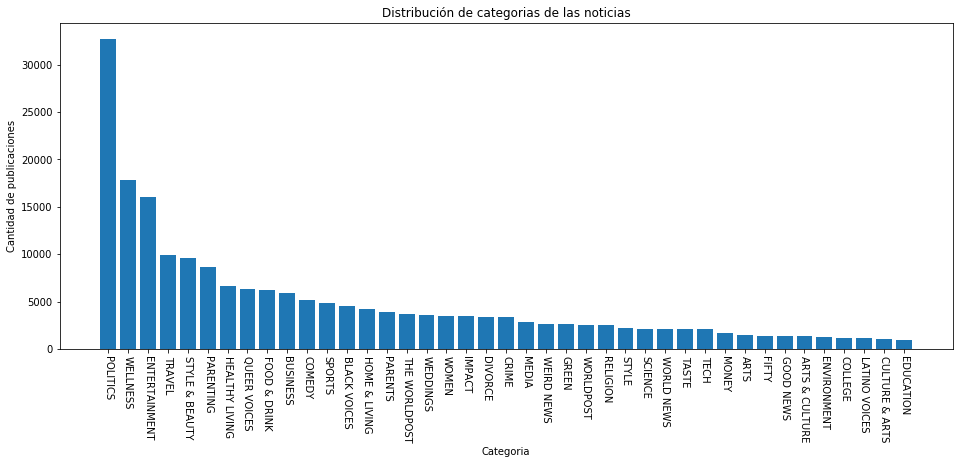

In [6]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(df_temp.Categoria, df_temp.Frecuencia)
plt.xlabel("Categoria")
plt.xticks(rotation=270)
plt.ylabel("Cantidad de publicaciones")
plt.title("Distribución de categorias de las noticias")
plt.show()   

In [7]:
uni_c = df["category"].nunique()
len_c =len(df["category"])
len(df)
print("Se tienen {} categorias, y no tienen datos faltantes {} observaciones".format(uni_c, len_c))

Se tienen 41 categorias, y no tienen datos faltantes 200853 observaciones


Se observan algunos nombres similares por tanto se limpian para tener menos catergorias y que el dataset este un poco mas balanceado

In [8]:
def category_group(x):
    
    if x == 'THE WORLDPOST':
        return 'WORLDPOST'
    elif x == 'PARENTING':
        return 'PARENTS'
    elif x == 'ARTS' or x == 'CULTURE & ARTS':
        return 'ARTS & CULTURE'
    elif x == 'STYLE':
        return 'STYLE & BEAUTY'
    elif x == 'COLLEGE':
        return 'EDUCATION'
    elif x == 'TASTE':
        return 'FOOD & DRINK'
    else:
        return x
    
df['category'] = df.category.apply(category_group)

In [9]:
uni_c = df["category"].nunique()
len(df)
print("Al limpiar las categorias se tiene {} categorias".format(uni_c))

Al limpiar las categorias se tiene 34 categorias


In [10]:
df_temp = pd.DataFrame(pd.value_counts(df['category']))
df_temp['Categoria'] = df_temp.index # organizar top categorias
df_temp = df_temp.rename(columns={'category': 'Frecuencia', 'Categoria': 'Categoria'})
df_temp = df_temp.reset_index(drop = True)
df_temp.head()

,Frecuencia,Categoria
0,32739,POLITICS
1,17827,WELLNESS
2,16058,ENTERTAINMENT
3,12632,PARENTS
4,11903,STYLE & BEAUTY


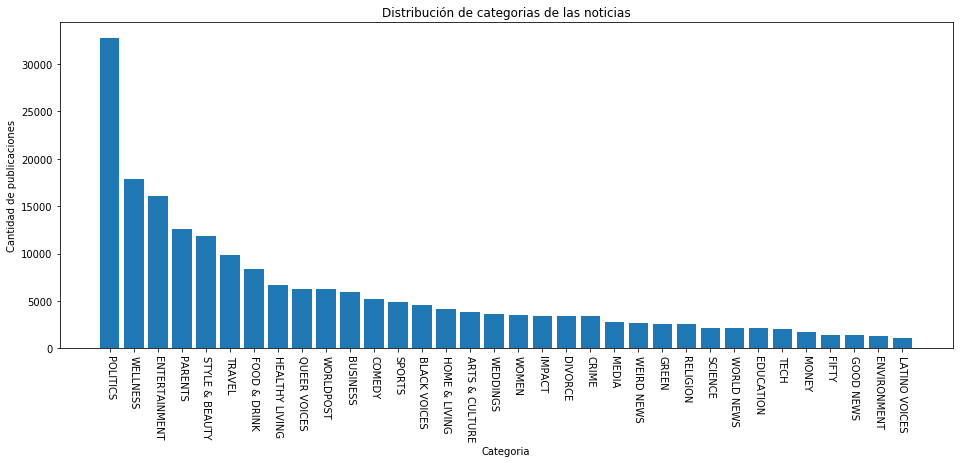

In [11]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(df_temp.Categoria, df_temp.Frecuencia)
plt.xlabel("Categoria")
plt.xticks(rotation=270)
plt.ylabel("Cantidad de publicaciones")
plt.title("Distribución de categorias de las noticias")
plt.show() 

In [12]:
c1 = len(df[df['category'] == 'ENTERTAINMENT'])
c2 = len(df[df['category'] == 'POLITICS'])
c3 = len(df[df['category'] == 'WORLDPOST'])
print("ENTERTAINMENT = {} noticias, POLITICS = {} noticias, WORLDPOST = {}".format(c1, c2, c3))

ENTERTAINMENT = 16058 noticias, POLITICS = 32739 noticias, WORLDPOST = 6243


In [13]:
p = (c1 + c2 + c3)/len(df)*100
p = np.round(p, 2)
print("Las categorias ENTERTAINMENT, POLITICS y WORLDPOST son el {} % de las noticias,".format(p))
print("un total de {} noticias".format(c1 + c2 + c3))

Las categorias ENTERTAINMENT, POLITICS y WORLDPOST son el 27.4 % de las noticias,
un total de 55040 noticias


La variable **category** tiene 34 categorias pero nos estan distribuidas de manera uniforme *ENTERTAINMENT*, *POLITICS* y *WORLDPOST* tienen el 25.58% de todas las noticias

In [14]:
top_category = pd.DataFrame(pd.value_counts(df['category']))
top_category['Cat'] = top_category.index # organizar top categorias
top_category = top_category.reset_index(drop = True)
top_category.columns = ['Frecuencia', 'Categoria']
top_category = top_category.iloc[0:9]
top_category

,Frecuencia,Categoria
0,32739,POLITICS
1,17827,WELLNESS
2,16058,ENTERTAINMENT
3,12632,PARENTS
4,11903,STYLE & BEAUTY
5,9887,TRAVEL
6,8322,FOOD & DRINK
7,6694,HEALTHY LIVING
8,6314,QUEER VOICES


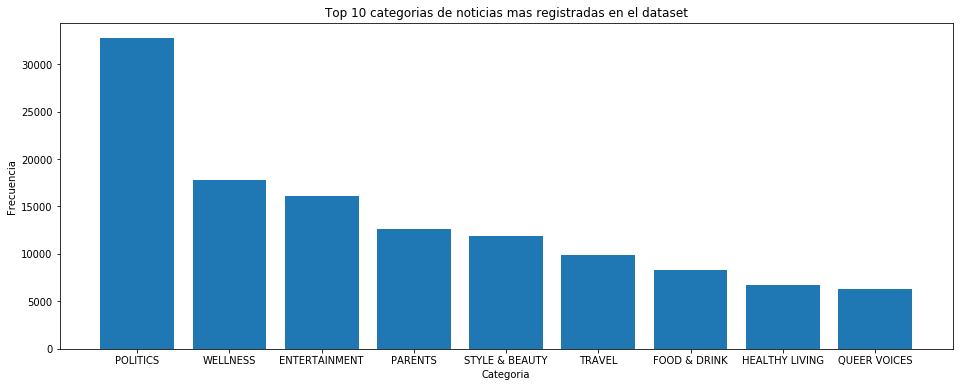

In [15]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(top_category.Categoria, top_category.Frecuencia)
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')
plt.title('Top 10 categorias de noticias mas registradas en el dataset')
plt.show()

### Variable  authors

In [16]:
df["authors"].nunique()

27993

In [17]:
pd.value_counts(df['authors'])

                                                                                                  36620
Lee Moran                                                                                          2423
Ron Dicker                                                                                         1913
Reuters, Reuters                                                                                   1562
Ed Mazza                                                                                           1322
Cole Delbyck                                                                                       1140
Andy McDonald                                                                                      1068
Julia Brucculieri                                                                                  1059
Carly Ledbetter                                                                                    1054
Curtis M. Wong                                                  

In [18]:
top_authors = pd.DataFrame(pd.value_counts(df['authors']))
top_authors['Aut'] = top_authors.index # organizar top categorias
top_authors = top_authors.reset_index(drop = True)
top_authors.columns = ['Frecuencia', 'authors']
top_authors = top_authors.iloc[0:11]
top_authors

,Frecuencia,authors
0,36620,
1,2423,Lee Moran
2,1913,Ron Dicker
3,1562,"Reuters, Reuters"
4,1322,Ed Mazza
5,1140,Cole Delbyck
6,1068,Andy McDonald
7,1059,Julia Brucculieri
8,1054,Carly Ledbetter
9,1020,Curtis M. Wong


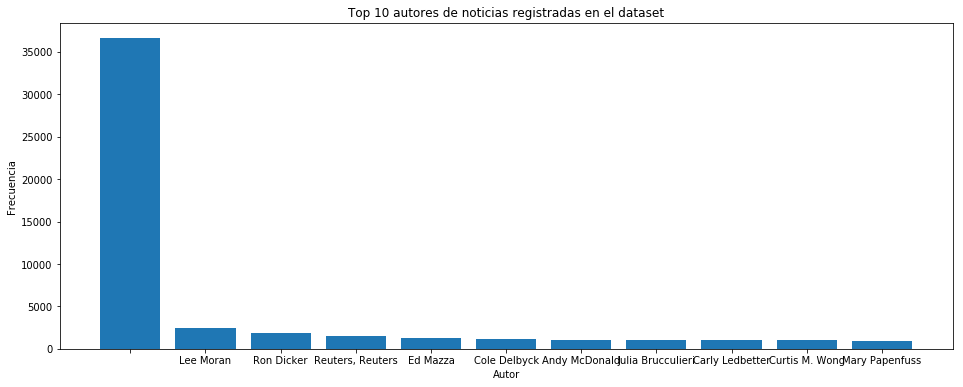

In [19]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(top_authors.authors, top_authors.Frecuencia)
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Top 10 autores de noticias registradas en el dataset')
plt.show()

In [20]:
pd.value_counts(df['authors'] == '')

False    164233
True      36620
Name: authors, dtype: int64

In [21]:
36620/ len(df)

0.18232239498538733

En el análisis se puede observar que se tienen **36620** registros sin el autor esto equivale al **18.23%** del total de los articulos por esta razón se procede a visualizar los datos sin tener en cuenta los valores que no tienen el autor

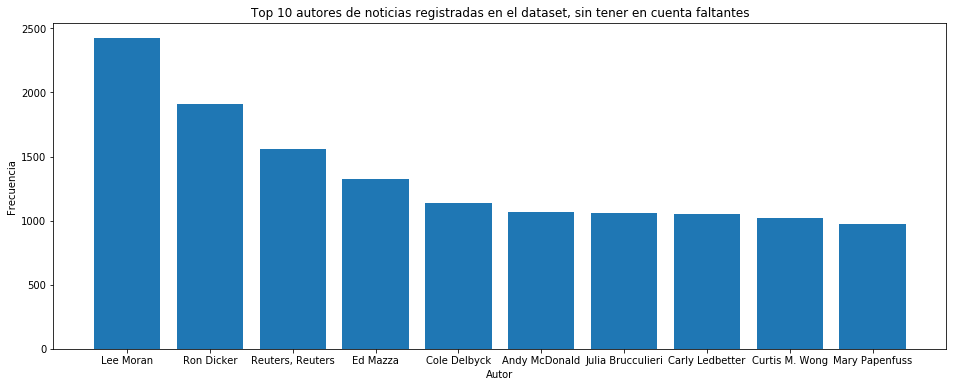

In [22]:
top_authors_nw = top_authors.iloc[1:12] # no se seleccionan los datos sin autor
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(top_authors_nw.authors, top_authors_nw.Frecuencia)
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Top 10 autores de noticias registradas en el dataset, sin tener en cuenta faltantes')
plt.show()

### Variable date

In [23]:
date = pd.DataFrame(df['date'])
date.head()

,date
0,2018-05-26
1,2018-05-26
2,2018-05-26
3,2018-05-26
4,2018-05-26


In [24]:
type(date)

pandas.core.frame.DataFrame

In [25]:
date['Freq'] = 1
date.index = date['date'] 
date = date.drop(columns=['date'])
date.head()

,Freq
date,
2018-05-26,1
2018-05-26,1
2018-05-26,1
2018-05-26,1
2018-05-26,1


In [26]:
date_res_d = date.resample('D').count() # resample por día
date_res_d.head()

,Freq
date,
2012-01-28,66
2012-01-29,65
2012-01-30,100
2012-01-31,100
2012-02-01,100


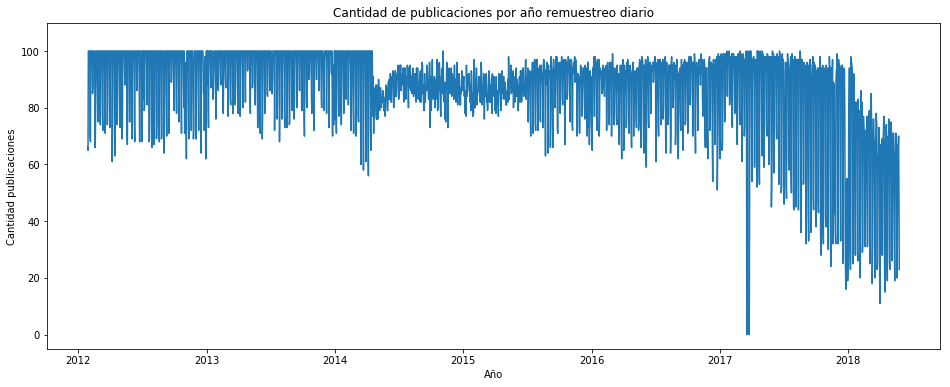

In [27]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.plot(date_res_d)
plt.xlabel('Año')
plt.ylabel('Cantidad publicaciones')
plt.title('Cantidad de publicaciones por año remuestreo diario')
plt.ylim([-5, 110])
plt.show()

In [28]:
date_res_m = date.resample('MS').count() # resample por mes
date_res_m.head()

,Freq
date,
2012-01-01,331
2012-02-01,2693
2012-03-01,2880
2012-04-01,2769
2012-05-01,2899


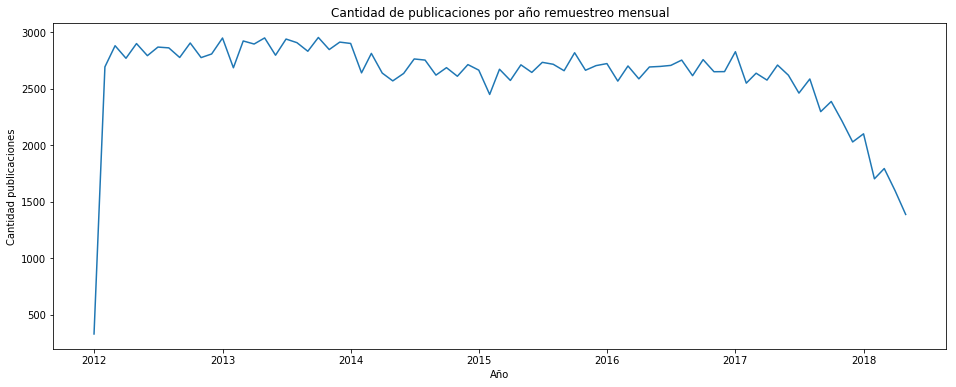

In [29]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.plot(date_res_m)
plt.xlabel('Año')
plt.ylabel('Cantidad publicaciones')
plt.title('Cantidad de publicaciones por año remuestreo mensual')
#plt.ylim([100, 700])
plt.show()

#### Frecuencias de la variable date por mes y por día

In [30]:
# buscar frecuendia por mes y por día
date_t = pd.DataFrame(df['date'])

In [31]:
date_t['Mes'] = pd.DatetimeIndex(date_t['date']).month_name()
date_t.head()

,date,Mes
0,2018-05-26,May
1,2018-05-26,May
2,2018-05-26,May
3,2018-05-26,May
4,2018-05-26,May


In [32]:
date_t_group = date_t
date_t_group = date_t_group.groupby(['Mes']).count()
date_t_group['Meses'] = date_t_group.index
date_t_group = date_t_group.reset_index(drop = True)
date_t_group

,date,Meses
0,17635,April
1,16576,August
2,15816,December
3,17286,February
4,16493,January
5,16470,July
6,16183,June
7,18418,March
8,17917,May
9,15756,November


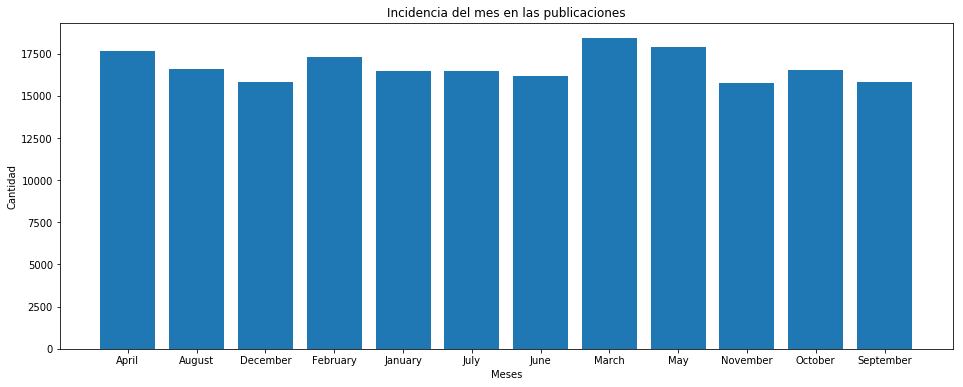

In [33]:
plt.figure(figsize=(16,6)) # tamaño del plot
plt.bar(date_t_group.Meses, date_t_group.date)
plt.xlabel('Meses')
plt.ylabel('Cantidad')
plt.title('Incidencia del mes en las publicaciones')
plt.show()

In [34]:
mayor = date_t_group.date.max() 
menor = date_t_group.date.min()
rango = mayor - menor
print("El mayor valor de publicaciones sumando los meses es: {} y el menor es : {}, para un rango de {}".
      format(mayor, menor, rango))

El mayor valor de publicaciones sumando los meses es: 18418 y el menor es : 15756, para un rango de 2662


Con respecto a esta variable no se puede ver una estacionalidad clara ni un mes en el que sea mayor la incidencia de publicaciones el rango es de 2662

### Variables authors &	category	

In [87]:
top_authors_nw.head(10)

,Frecuencia,authors
1,2423,Lee Moran
2,1913,Ron Dicker
3,1562,"Reuters, Reuters"
4,1322,Ed Mazza
5,1140,Cole Delbyck
6,1068,Andy McDonald
7,1059,Julia Brucculieri
8,1054,Carly Ledbetter
9,1020,Curtis M. Wong
10,974,Mary Papenfuss


In [36]:
aut_cat = pd.merge(top_authors_nw, df) # joint de los datos en funcion de el top 10 de los autores

In [37]:
top = len(aut_cat)
all_pub = len(df)
aut_porcent = np.round(((top/all_pub) * 100), 2)
print("El top 10 de autores producen el {}% del total de los articulos".format(aut_porcent))

El top 10 de autores producen el 6.74% del total de los articulos


In [38]:
aut_cat.Frecuencia = 1
aut_cat.head()

,Frecuencia,authors,category,date,headline,link,short_description
0,1,Lee Moran,COMEDY,2018-05-24,'Late Night' Writer's Breathless Royal Wedding...,https://www.huffingtonpost.com/entry/royal-wed...,"“Then he bites his lip, like, ‘Hmm, girl.’”"
1,1,Lee Moran,COMEDY,2018-05-24,Seth Meyers Gives Donald Trump Some Valuable M...,https://www.huffingtonpost.com/entry/seth-meye...,"“Stop trying to make ‘Fetch’ happen."""
2,1,Lee Moran,POLITICS,2018-05-24,Chrissy Teigen Taunts Donald Trump Over Twitte...,https://www.huffingtonpost.com/entry/chrissy-t...,"Other tweeters, including Mexico's former pres..."
3,1,Lee Moran,COMEDY,2018-05-24,Samantha Bee Torches ICE: 'Let's Shut It The F...,https://www.huffingtonpost.com/entry/samantha-...,"""I’m serious. It’s awful. And we don’t actuall..."
4,1,Lee Moran,MEDIA,2018-05-24,Jake Tapper Shreds Donald Trump With A Long Li...,https://www.huffingtonpost.com/entry/jake-tapp...,"""I could go on, but this is just an hour show."""


Con respecto a estas dos variables se puede ver que el top de los 10 primeros autores en publicar artículos solo cubren el 6.74% de todas las publicaciones, el peso de las publicaciones que no tienen autores es del 18.23% con 36620 publicaciones con la observación de la variable authors en blanco, esto hace que el 75.03% de las publicaciones tengan una variabilidad muy alta en cuanto a autores lo cual dificulta analiza esta variable

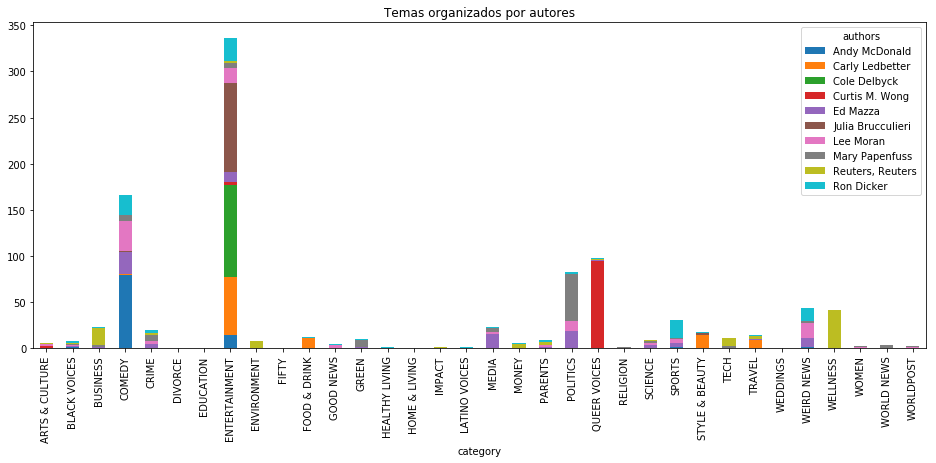

In [89]:
plot = pd.crosstab(index = aut_cat['category'],
            columns = aut_cat['authors'] # tabla de frecuencias por categoria 
                  ).apply(lambda r: r/r.sum() * 100, # promedio ponderado categorias
                          axis=0).plot(kind='bar', stacked=True, 
                                       figsize = (16, 6),
                                       title = "Temas organizados por autores"                                       
                                      )

Se puede observar en los datos que los temas donde se publican mas noticias no son los mismo de los autores que mas publican, el top 10 de autores en publicar publican en la categoria ENTRERTAINMENT, esto hace mas desvalanceados los datos y al publicar un articulo en con estos datos la mayor porbabilidad es que sea de politica pero no de un autor del top 10

### Variables  authors, category & date

In [40]:
aut_cat['Año'] = pd.DatetimeIndex(aut_cat['date']).year

In [41]:
aut_cat.head()

,Frecuencia,authors,category,date,headline,link,short_description,Año
0,1,Lee Moran,COMEDY,2018-05-24,'Late Night' Writer's Breathless Royal Wedding...,https://www.huffingtonpost.com/entry/royal-wed...,"“Then he bites his lip, like, ‘Hmm, girl.’”",2018
1,1,Lee Moran,COMEDY,2018-05-24,Seth Meyers Gives Donald Trump Some Valuable M...,https://www.huffingtonpost.com/entry/seth-meye...,"“Stop trying to make ‘Fetch’ happen.""",2018
2,1,Lee Moran,POLITICS,2018-05-24,Chrissy Teigen Taunts Donald Trump Over Twitte...,https://www.huffingtonpost.com/entry/chrissy-t...,"Other tweeters, including Mexico's former pres...",2018
3,1,Lee Moran,COMEDY,2018-05-24,Samantha Bee Torches ICE: 'Let's Shut It The F...,https://www.huffingtonpost.com/entry/samantha-...,"""I’m serious. It’s awful. And we don’t actuall...",2018
4,1,Lee Moran,MEDIA,2018-05-24,Jake Tapper Shreds Donald Trump With A Long Li...,https://www.huffingtonpost.com/entry/jake-tapp...,"""I could go on, but this is just an hour show.""",2018


In [42]:
Años_pub = aut_cat.Año.unique()
Años_pub

array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

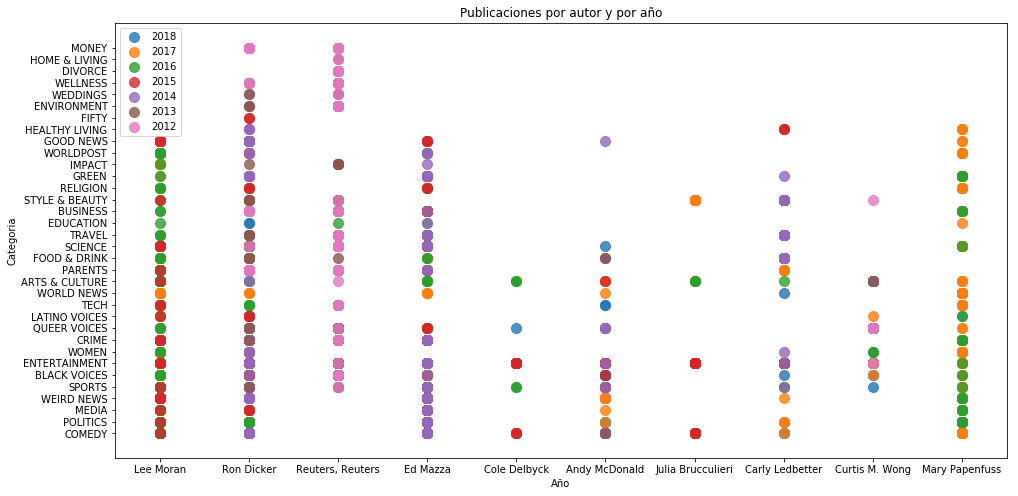

In [43]:
plt.figure(figsize=(16,8)) # tamaño del plot
for i in Años_pub:
    f = aut_cat[aut_cat['Año'] == i]
    plt.scatter(f.authors, f.category, label = i, s = 100, alpha = 0.8)
    plt.legend(loc = 'upper left')
    plt.title("Publicaciones por autor y por año")
    plt.xlabel("Año")
    plt.ylabel("Categoria")    

Con respecto a estas tres variables se puede observar como los autores que mas publican no son tan especializados y algunos no son tan activos en los diferentes años

## Procesaminto de lenguaje natural de los datos

### Alistamiento de los datos para determinar categoría según descripción y los titulares

In [44]:
df_class = df[['category', 'headline', 'short_description']]
df_class.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [45]:
df_class_joint = df_class

In [46]:
p = df_class.headline + ' ' + df_class.short_description
df_class_joint['text'] = p
df_class_joint = df_class_joint.drop(columns=['headline','short_description'])
df_class_joint.head()

/home/oscar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [47]:
len(df_class_joint)

200853

In [48]:
df_class_joint.head()

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


### Modelo Naive Bayes

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_class_joint['text'], 
                                                    df_class_joint['category'], 
                                                    random_state = 137,
                                                    train_size = 0.8)
print("X_train {} y X_test {}".format(len(X_train), len(X_test)))

/home/oscar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


X_train 160682 y X_test 40171


In [51]:
%%time
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = ComplementNB().fit(X_train_tfidf, y_train)

CPU times: user 22.9 s, sys: 537 ms, total: 23.4 s
Wall time: 23.6 s


In [52]:
probe = pd.DataFrame(df_class_joint.text[X_test])

In [53]:
pos = 0
probe.index[pos]

"Chris Brown And Rihanna Offend, 'Wanderlust' Hits A Dead End And More: The Week In Ouch In the fourth installment of our weekly round-up of brutal, if over-the-top reviews, a critic called Rihanna and Chris Brown's"

In [54]:
pred = clf.predict(count_vect.transform([probe.index[pos]]))
pred[0]

'ENTERTAINMENT'

In [55]:
df_class_joint[df_class_joint['text'] == probe.index[pos]]

,category,text
198274,ENTERTAINMENT,"Chris Brown And Rihanna Offend, 'Wanderlust' H..."


In [56]:
%%time
pred_model = []
for i in range(len(X_test)):
    p = clf.predict(count_vect.transform([X_test.iloc[i]]))
    pred_model.append(p[0])    
    if(i+1)%100==0:
        print("Iteración {}".format(i))

Iteración 99
Iteración 199
Iteración 299
Iteración 399
Iteración 499
Iteración 599
Iteración 699
Iteración 799
Iteración 899
Iteración 999
Iteración 1099
Iteración 1199
Iteración 1299
Iteración 1399
Iteración 1499
Iteración 1599
Iteración 1699
Iteración 1799
Iteración 1899
Iteración 1999
Iteración 2099
Iteración 2199
Iteración 2299
Iteración 2399
Iteración 2499
Iteración 2599
Iteración 2699
Iteración 2799
Iteración 2899
Iteración 2999
Iteración 3099
Iteración 3199
Iteración 3299
Iteración 3399
Iteración 3499
Iteración 3599
Iteración 3699
Iteración 3799
Iteración 3899
Iteración 3999
Iteración 4099
Iteración 4199
Iteración 4299
Iteración 4399
Iteración 4499
Iteración 4599
Iteración 4699
Iteración 4799
Iteración 4899
Iteración 4999
Iteración 5099
Iteración 5199
Iteración 5299
Iteración 5399
Iteración 5499
Iteración 5599
Iteración 5699
Iteración 5799
Iteración 5899
Iteración 5999
Iteración 6099
Iteración 6199
Iteración 6299
Iteración 6399
Iteración 6499
Iteración 6599
Iteración 6699
Iterac

In [57]:
len(pred_model)

40171

In [58]:
Acc_NB = pd.DataFrame()

In [59]:
Acc_NB['Real'] = y_test
Acc_NB['Predicho'] = pred_model

In [60]:
Acc_NB.head()

,Real,Predicho
198274,ENTERTAINMENT,ENTERTAINMENT
9281,POLITICS,POLITICS
85726,WORLDPOST,POLITICS
156506,WELLNESS,WELLNESS
72313,LATINO VOICES,STYLE & BEAUTY


In [61]:
Acierto = []
for i in range(len(Acc_NB)):
    if Acc_NB.Real.iloc[i] == Acc_NB.Predicho.iloc[i]:
        n = 1
    else:
        n = 0
    Acierto.append(n)

In [62]:
Acc_NB['Acierto'] = Acierto

In [63]:
Acc_NB.tail()

,Real,Predicho,Acierto
73859,POLITICS,POLITICS,1
6393,IMPACT,POLITICS,0
92933,SCIENCE,SCIENCE,1
4603,WORLD NEWS,POLITICS,0
168889,WELLNESS,WELLNESS,1


In [64]:
Acc_mod_NB = np.mean(Acc_NB.Acierto)
print("La efectividad del modelo es de {}%".format(np.round(Acc_mod_NB * 100, 2)))

La efectividad del modelo es de 60.4%


### Modelo Linear SVC

In [65]:
texts = df_class_joint.text
df_class_joint.head()

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [66]:
#limpieza de los datos
texts = [x.lower() for x in texts] # Convertir los textos a minúscula
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts] # Eliminamos signos de puntuación
texts = [''.join(c for c in x if c not in '0123456789') for x in texts] # Eliminamos los números
texts = [' '.join(x.split()) for x in texts] # Eliminar espacios en blanco y separadores extras

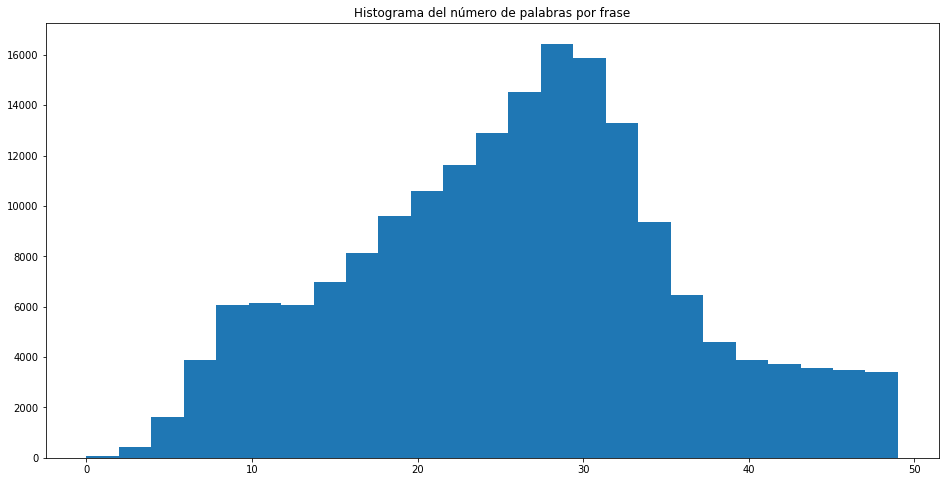

In [67]:
plt.figure(figsize=(16,8)) # tamaño del plot
texts_lengths = [len(x.split()) for x in texts]
texts_lengths = [x for x in texts_lengths if x < 50]
plt.hist(texts_lengths, bins=25)
plt.title("Histograma del número de palabras por frase")
plt.show()

In [68]:
sentence_size = 48
min_word_freq = 3

In [69]:
vocab_processor = learn.preprocessing.VocabularyProcessor(sentence_size, min_frequency=min_word_freq)
vocab_processor.fit_transform(texts)
transformed_texts = np.array([x for x in vocab_processor.transform(texts)])
embedding_size = len(np.unique(transformed_texts))

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [70]:
transformed_texts # texto como bag of words

array([[   70,    73,  1281, ...,     0,     0,     0],
       [   42,  1570,  2859, ...,     0,     0,     0],
       [ 5744,  5103,  7760, ...,     0,     0,     0],
       ...,
       [ 4009,    75,  4942, ...,     0,     0,     0],
       [28704,  1570,  1046, ...,     0,     0,     0],
       [15537,  4538,  3574, ...,     0,     0,     0]])

In [71]:
transformed_texts.shape

(200853, 48)

In [98]:
category_text = np.array(df_class_joint.category)
pd.DataFrame(category_text).unique

AttributeError: 'DataFrame' object has no attribute 'unique'

In [73]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(category_text)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target = onehot_encoder.fit_transform(integer_encoded)

/home/oscar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [74]:
integer_encoded[0]

array([4])

In [75]:
label_encoder.classes_

array(['ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COMEDY', 'CRIME',
       'DIVORCE', 'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY',
       'FOOD & DRINK', 'GOOD NEWS', 'GREEN', 'HEALTHY LIVING',
       'HOME & LIVING', 'IMPACT', 'LATINO VOICES', 'MEDIA', 'MONEY',
       'PARENTS', 'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE',
       'SPORTS', 'STYLE & BEAUTY', 'TECH', 'TRAVEL', 'WEDDINGS',
       'WEIRD NEWS', 'WELLNESS', 'WOMEN', 'WORLD NEWS', 'WORLDPOST'],
      dtype=object)

In [76]:
target[0] # categorias como one hot

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(transformed_texts, 
                                                                                 df_class_joint.category, df_class_joint.index, 
                                                                                 test_size = 0.3, 
                                                                                 random_state = 137)

In [78]:
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

### Red neuronal

In [79]:
import tflearn # libreria simplificada por encima de tensor flow

Instructions for updating:
Colocations handled automatically by placer.


In [80]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(transformed_texts,
                                                            target, 
                                                            test_size = 0.2, 
                                                            random_state = 137)

In [81]:
print(len(X_train_t))
print(len(X_test_t))
print(len(y_train_t))
print(len(y_test_t))

160682
40171
160682
40171


In [82]:
X_train_t.shape

(160682, 48)

In [83]:
entradas = 48 # 48 por el largo del vector
capa1 = 96 # las neuronas son un valor que se debe ajustar dependiendo del problema
capa2 = 144
clases = 34 # estas son las clases para la clasificación al final del entrenamiento de la red neuronal
learning_Rate = 0.005

In [84]:
def crear_modelo():
    tf.reset_default_graph() # este comando hace un reset en caso de tener algo en memoria
    red = tflearn.input_data([None, entradas]) # esta es la entrada de los datos de la red neuronal, None para enviar la información por lotes
    red = tflearn.fully_connected(red, capa1, activation='ReLU') # son las conexiones de las capas de las red neuronal
    red = tflearn.fully_connected(red, capa2, activation='ReLU') # son las conexiones de las capas de las red neuronal
    red = tflearn.fully_connected(red, clases, activation='softmax') # capa de sálida en este caso por ser clasificación la activación es "softmax"
    red = tflearn.regression(red, optimizer = 'adam', # optimizador de gradiante desendiente estocástico
                             learning_rate = learning_Rate, loss = 'categorical_crossentropy') # la tasa de aprendizaje es un valor pequeño
    modelo = tflearn.DNN(red, tensorboard_verbose = 3) # la variable de modelo cargar toda la estructura red DNN red neruonal profunda tensorboard_verbose = 3 para mostrar graficas
    return modelo

In [85]:
modelo = crear_modelo() # para aplicar la función de crear_modelo con los parametros anteriores

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [86]:
%%time
modelo.fit(X_train_t, y_train_t, # variables de entrenamiento
           validation_set = 0.2, # % de datos que dejo para la validación del modelo, no confundir con los datos de validación, los datos de validación no los debe ver el modelo por temas de aver fitting
           show_metric = True, # muestra las metricas
           batch_size = 20000, # cantidad de batch de datos que voy a enviar por iteración al modelo
           n_epoch = 100) # es que tantas veces se va a barrer e conjunto completo de datos

Training Step: 4878  | total loss: 3.14204 | time: 2.136s
| Adam | epoch: 697 | loss: 3.14204 - acc: 0.1624 -- iter: 120000/128545


KeyboardInterrupt: 

### Red II

In [92]:
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# IMDB Dataset loading
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000,
                                valid_portion=0.1)
trainX, trainY = train
testX, testY = test

# Data preprocessing
# Sequence padding
trainX = pad_sequences(trainX, maxlen=100, value=0.)
testX = pad_sequences(testX, maxlen=100, value=0.)
# Converting labels to binary vectors
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Network building
net = tflearn.input_data([None, 100])
net = tflearn.embedding(net, input_dim=10000, output_dim=128)
net = tflearn.lstm(net, 128, dropout=0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
                         loss='categorical_crossentropy')

# Training
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=(testX, testY), show_metric=True,
          batch_size=32)

TypeError: to_categorical() missing 1 required positional argument: 'nb_classes'

In [91]:
imdb

<module 'tflearn.datasets.imdb' from '/home/oscar/anaconda3/lib/python3.7/site-packages/tflearn/datasets/imdb.py'>